In [5]:
%load_ext autoreload

In [6]:
%autoreload 2

In [7]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def generate_random_normal_space(dim):
    # create n dimensional space by randomly generating n tuples of mean and std
    arr = np.empty((dim,), dtype=[('mean', '<f8'), ('std', '<f8')])
    arr['mean'] = np.random.uniform(0, 2, dim) - 1
    arr['std'] = np.random.uniform(0, 10, dim)
    return arr

In [5]:
def sample_normal_space(space_specs, n):
    # take n samples from a normal space defined by an array of mean and stds
    return np.vstack([np.random.normal(a['mean'], a['std'], n) for a in space_specs])

In [3]:
a = generate_random_normal_space(2)
a

array([(-0.04641221, 1.5694226 ), (-0.50619594, 4.88027194)],
      dtype=[('mean', '<f8'), ('std', '<f8')])

In [6]:
b = sample_normal_space(a, 3000)
b.shape

(2, 3000)

In [7]:
kernel = stats.gaussian_kde(b)

In [8]:
xmin = b[0].min()
xmax = b[0].max()
ymin = b[1].min()
ymax = b[1].max()
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])

In [9]:
Z = np.reshape(kernel(positions).T, X.shape)

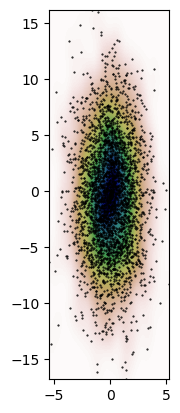

In [10]:
fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r, extent=[xmin, xmax, ymin, ymax])
ax.plot(b[0], b[1], 'k.', markersize=1)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

In [11]:
kernel.integrate_box([-10, -2.5], [10, 2.5])

0.3733707229392925

In [43]:
kernel.integrate_gaussian(a['mean'], np.diag(a['std']))

0.023555222644360108

In [12]:
d1 = generate_random_normal_space(1)
d1

array([(0.75115634, 5.42617077)], dtype=[('mean', '<f8'), ('std', '<f8')])

In [13]:
samples = np.random.normal(d1['mean'], d1['std'], 3000)

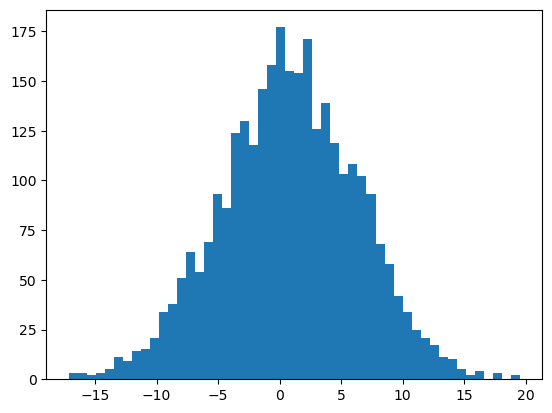

In [14]:
plt.hist(samples, 50)
plt.show()

In [15]:
k = stats.gaussian_kde(samples)

In [16]:
x = np.arange(-20, 20, 1)
z = k(x)

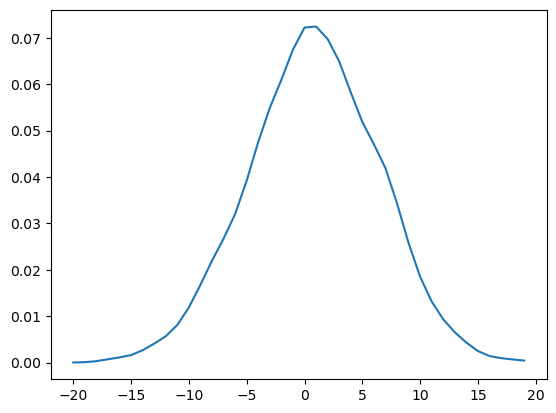

In [18]:
plt.plot(x, z)

In [19]:
k.integrate_box_1d(-20, 20)

0.9998204556874047

In [20]:
np.sum(z)

0.99970111544461

In [21]:
diff = np.abs(z - 1 / 40)
diff

array([0.02499195, 0.02493224, 0.02470796, 0.02429808, 0.0238953 ,
       0.02339608, 0.02235498, 0.0209431 , 0.01933794, 0.01690268,
       0.01312864, 0.00824772, 0.00304982, 0.00170492, 0.00702659,
       0.01421412, 0.02255009, 0.0299059 , 0.035957  , 0.04244563,
       0.04719249, 0.04743696, 0.04474024, 0.03990198, 0.03323736,
       0.02686087, 0.02206061, 0.01691338, 0.0093293 , 0.00075905,
       0.0064975 , 0.01185488, 0.0156886 , 0.01848969, 0.02071243,
       0.02252311, 0.02360267, 0.02405543, 0.02433905, 0.0245855 ])

In [22]:
np.sum(diff)

0.8847718235218576

In [23]:
u_samples = np.random.uniform(-20, 20, 3000)
k2 = stats.gaussian_kde(u_samples)

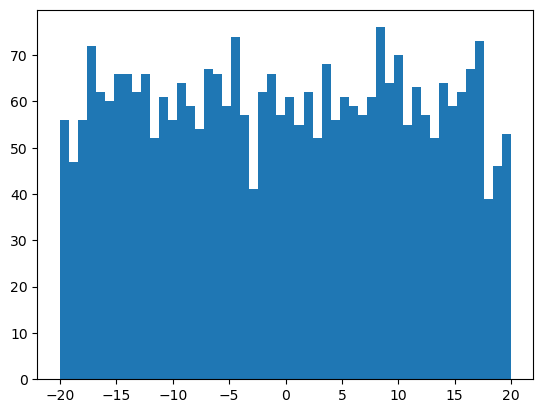

In [26]:
plt.hist(u_samples, 50)
plt.show()

In [27]:
x2 = np.arange(-20, 20, 0.5)
z2 = k2(x2)

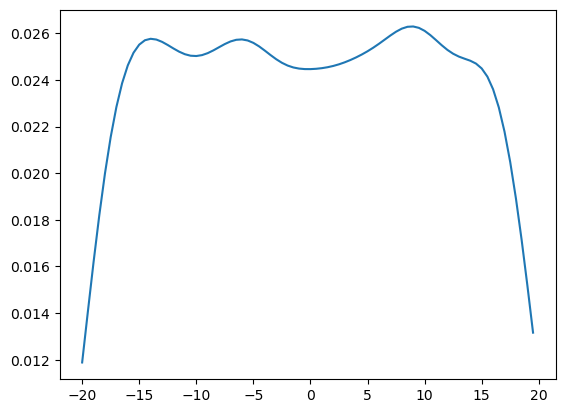

In [28]:
plt.plot(x2, z2)
plt.show()

In [29]:
np.sum(z2 * 0.5)

0.9583668488201721

In [30]:
k2.integrate_box_1d(-20, 20)

0.9583486862228032

In [32]:
np.sum(np.abs(z2 - 1/40) * 0.5)

0.06448549001498566

In [ ]:
# integrate(k(x) - f(x))

In [8]:
import sys

sys.path.append('..')

from util.participant_stream import ParticipantStream

In [5]:
stream = ParticipantStream(seed=3098)

In [63]:
stream.generate_participants(10)

[{'party': 'Democrat',
  'age': 53,
  'gender': 'M',
  'arrival_time': 5,
  'departure_time': 76},
 {'party': 'Republican',
  'age': 52,
  'gender': 'M',
  'arrival_time': 9,
  'departure_time': 24},
 {'party': 'Republican',
  'age': 40,
  'gender': 'M',
  'arrival_time': 10,
  'departure_time': 57},
 {'party': 'Republican',
  'age': 57,
  'gender': 'M',
  'arrival_time': 10,
  'departure_time': 107},
 {'party': 'Republican',
  'age': 59,
  'gender': 'M',
  'arrival_time': 11,
  'departure_time': 53},
 {'party': 'Republican',
  'age': 63,
  'gender': 'F',
  'arrival_time': 14,
  'departure_time': 47},
 {'party': 'Republican',
  'age': 51,
  'gender': 'F',
  'arrival_time': 17,
  'departure_time': 25},
 {'party': 'Republican',
  'age': 53,
  'gender': 'M',
  'arrival_time': 18,
  'departure_time': 37},
 {'party': 'Democrat',
  'age': 38,
  'gender': 'F',
  'arrival_time': 30,
  'departure_time': 198},
 {'party': 'Independent',
  'age': 19,
  'gender': 'M',
  'arrival_time': 48,
  'depar

In [64]:
df = pd.DataFrame(stream.generate_participants(1000))
df.head()

,party,age,gender,arrival_time,departure_time
0,Republican,74,M,1,9
1,Democrat,34,F,1,12
2,Republican,50,M,1,7
3,Independent,31,M,1,6
4,Democrat,35,F,1,11


<Axes: ylabel='Frequency'>

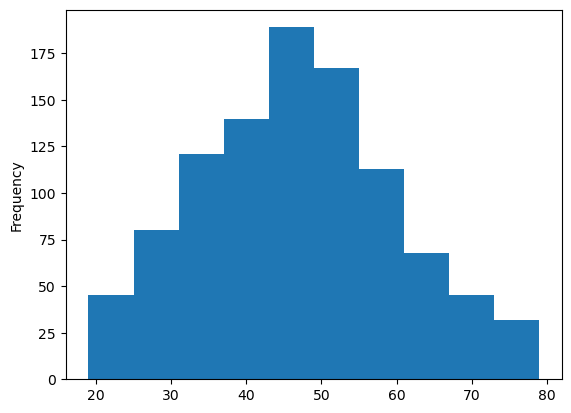

In [65]:
df['age'].plot(kind='hist')

(0.0, 150.0)

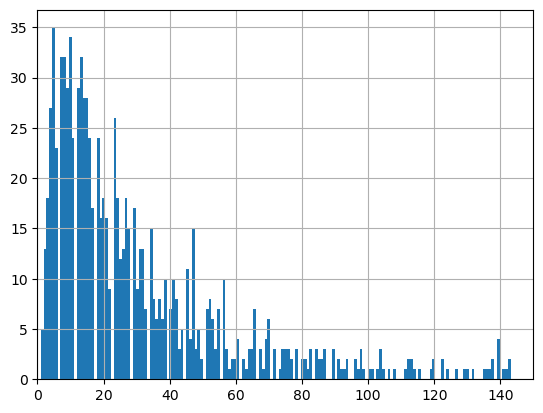

In [66]:
df['arrival_time'].hist(bins=500)
plt.xlim(0, 150)

(0.0, 150.0)

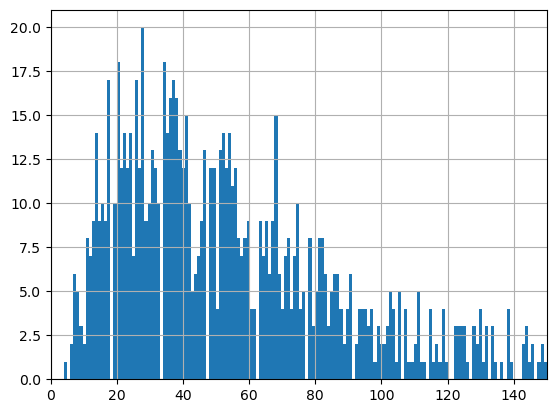

In [67]:
df['departure_time'].hist(bins=500)
plt.xlim(0, 150)

(0.0, 200.0)

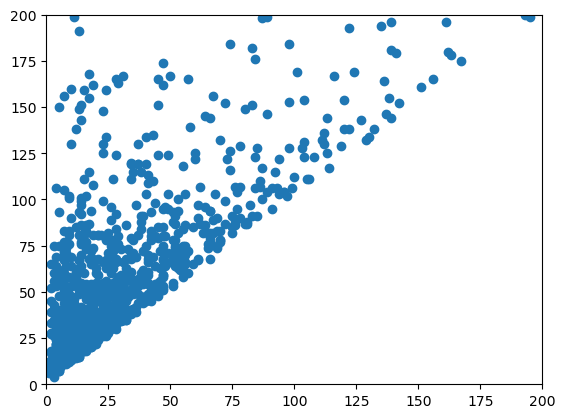

In [68]:
plt.scatter(df['arrival_time'].values, df['departure_time'].values)
plt.xlim(0, 200)
plt.ylim(0, 200)

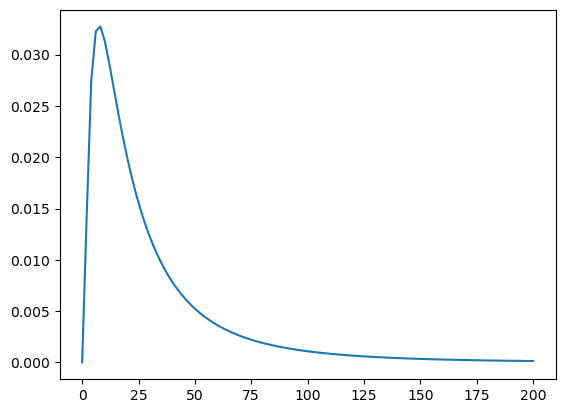

In [45]:
x = np.linspace(0, 200, 100)
plt.plot(x, stats.lognorm.pdf(x, s=1, scale=20))

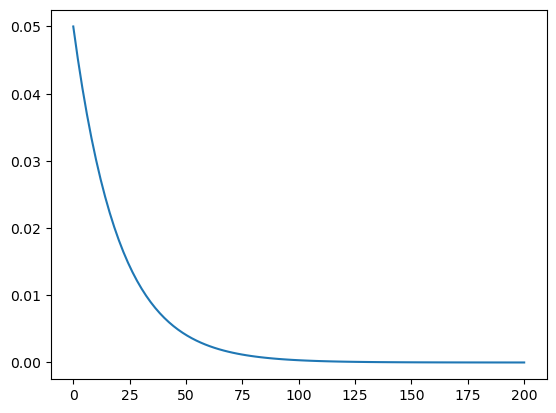

In [46]:
x = np.linspace(0, 200, 100)
plt.plot(x, stats.expon.pdf(x, scale=20))

#### Study 1
 - dyads  
 - one republican, one democrat  
 - uniformly sample over age and gender, balanced so that we get an even number of republicans at each age/gender combo, etc.
 - assign everyone who comes, with no leftovers if possible
 - a group of 3 as a backup to account for odd numbers is preferable to having leftovers

In [9]:
# Study 1
def encode_party(p1, p2):
    if (p1 == 'Republican' and p2 == 'Democrat') or (p1 == 'Democrat' and p2 == 'Republican'):
        return 1
    return 0

def encode_gender(p):
    return int(p =='F')

def encode_gender_pair(p1, p2):
    # M = 0, F = 1
    return int(p1 == 'F') + int(p2 == 'F')

gender_pdf = 1/3
age_pdf = 1 / (80 - 19)

def joint_pdf(party):
    return party * gender_pdf * age_pdf * age_pdf

v_joint_pdf = np.vectorize(joint_pdf, otypes=[float])

In [12]:
pool = stream.generate_participants(1000)
shuffled = np.array_split(np.random.permutation(pool), 500)

In [13]:
samples = np.array([[encode_party(p[0]['party'], p[1]['party']), p[0]['age'], p[1]['age'], encode_gender(p[0]['gender'], p[1]['gender'])] for p in shuffled])
samples

TypeError: encode_gender() takes 1 positional argument but 2 were given

In [26]:
x = samples.transpose()
x

array([[ 0,  1,  0, ...,  0,  0,  0],
       [36, 48, 29, ..., 35, 42, 54],
       [48, 25, 43, ..., 32, 50, 21],
       [ 1,  1,  1, ...,  0,  0,  1]])

In [27]:
k = stats.gaussian_kde(x)

In [31]:
diff = np.abs(np.subtract(k(x), v_joint_pdf(samples[:,0])))
diff


array([4.76315757e-04, 2.62984014e-05, 3.50785324e-04, 4.16506775e-04,
       4.72319001e-04, 2.48151271e-05, 4.55398715e-04, 2.80553933e-04,
       3.43489689e-04, 1.27542067e-04, 1.33197557e-04, 4.29103160e-04,
       1.34702327e-04, 1.49810973e-04, 2.43503224e-04, 5.52022030e-05,
       5.52666098e-05, 2.08567010e-04, 1.51336693e-04, 3.93125674e-05,
       4.57868562e-04, 1.41860218e-04, 8.47954691e-05, 4.74976137e-04,
       2.64178032e-04, 1.83806965e-04, 4.15192291e-04, 1.55795752e-04,
       2.14262775e-06, 3.37447598e-05, 6.17005716e-05, 9.85083581e-05,
       5.04664948e-05, 3.36301914e-04, 2.45160253e-04, 3.43051821e-05,
       4.71279729e-04, 2.32978694e-04, 8.06392849e-05, 3.06740033e-04,
       7.44855234e-06, 1.34646399e-04, 2.69751768e-04, 5.06259163e-05,
       2.54062941e-04, 6.23891454e-05, 8.61667171e-05, 1.08951302e-04,
       2.41743418e-04, 2.79669212e-04, 2.55296592e-04, 2.19224863e-05,
       2.17583814e-04, 3.65274690e-04, 3.08235047e-04, 1.55731412e-04,
      

In [32]:
np.sum(diff)

0.09125344376131746

In [11]:
## Take 2
pool = stream.generate_participants(3000)
dyads = np.array_split(pool, 500)
samples = np.array([[encode_party(p[0]['party'], p[1]['party']), p[0]['age'], p[1]['age'], encode_gender(p[0]['gender']), encode_gender(p[1]['gender'])] for p in dyads])
samples

array([[ 0, 35, 36,  1,  1],
       [ 1, 58, 46,  0,  1],
       [ 0, 51, 49,  1,  1],
       ...,
       [ 1, 53, 44,  0,  1],
       [ 0, 26, 44,  0,  0],
       [ 0, 31, 48,  0,  1]])

In [12]:
x = samples.transpose()
x

array([[ 0,  1,  0, ...,  1,  0,  0],
       [35, 58, 51, ..., 53, 26, 31],
       [36, 46, 49, ..., 44, 44, 48],
       [ 1,  0,  1, ...,  0,  0,  0],
       [ 1,  1,  1, ...,  1,  0,  1]])

In [13]:
kdes = [stats.gaussian_kde(xi) for xi in x]

In [14]:
# define theoretical
# party_pair, age_1, age_2, gender_1, gender_2
def party_pair_pdf(x):
    return x

def age_pdf(x):
    if 19 <= x and x <= 80:
        return 1 / (80-19)
    else:
        return 0
    
def gender_pdf(x):
    return 1/2

baseline = [party_pair_pdf, age_pdf, age_pdf, gender_pdf, gender_pdf]

In [ ]:
def s1_scoring(x):
    return sum(abs(kdes[i](v) - baseline[i](v)) for j in x for i, v in enumerate(j))



# Study 1 (Continuous Only)
- uniform distribution over space that has two dimensions
  - age of younger participant
  - age of older participant
- where age is in range 19 - 80

In [14]:
def continuous_dependent_uniform_space(dimension_bounds, num_samples, dependency_matrix=None):
    n = len(dimension_bounds)
    samples = np.zeros((n, num_samples))
    for i, (lb, ub) in enumerate(dimension_bounds):
        if dependency_matrix is None or np.sum(dependency_matrix[i]) == 0:
            samples[i, :] = np.random.uniform(lb, ub, num_samples)
        else:
            for j in range(num_samples):
                # Compute conditional distribution parameters based on previous values
                condition = samples[:i, j]
                conditional_min = lb + np.sum(dependency_matrix[i, :i] * condition)
                conditional_max = ub + np.sum(dependency_matrix[i, :i] * condition)
                
                # Sample from the conditional distribution
                samples[i, j] = np.random.uniform(conditional_min, conditional_max)

    return samples

In [15]:
def continuous_uniform_range_pair(lower_bound, upper_bound, num_samples):
    # samples = np.zeros((2, num_samples))
    # samples[0, :] = np.random.uniform(lower_bound, upper_bound, num_samples)
    # samples[1, :] = np.random.uniform(samples[0, :], upper_bound, num_samples)
    samples = np.random.uniform(lower_bound, upper_bound, (2, num_samples))
    for i in range(num_samples):
        while samples[0,i] == samples[1,i]:
            samples[0,i] = np.random.uniform(lower_bound, upper_bound)
            samples[1,i] = np.random.uniform(lower_bound, upper_bound)
        if samples[0,i] > samples[1, i]:
            samples[0,i], samples[1,i] = samples[1,i], samples[0,i]
    return samples

In [16]:
num_samples = 30000

s = continuous_uniform_range_pair(19, 80, num_samples)

In [17]:
bins = 60
hist, younger_edges, older_edges = np.histogram2d(s[0], s[1], bins=bins, range=[[19,80],[19,80]], density=True)

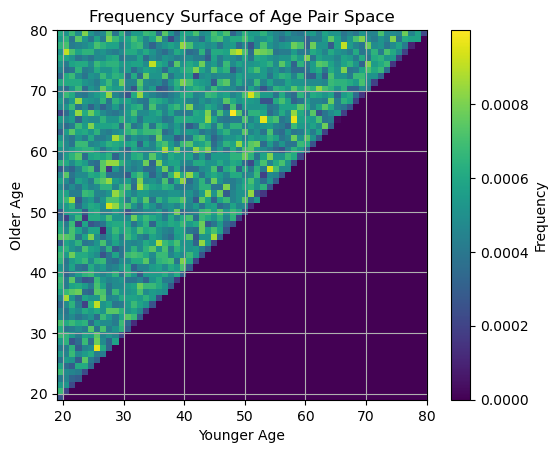

In [18]:
plt.imshow(hist.T, origin='lower', extent=[19, 80, 19, 80])
plt.colorbar(label='Frequency')
plt.title('Frequency Surface of Age Pair Space')
plt.xlabel('Younger Age')
plt.ylabel('Older Age')
plt.grid(True)
plt.show()

In [19]:
younger_edges

array([19.        , 20.01666667, 21.03333333, 22.05      , 23.06666667,
       24.08333333, 25.1       , 26.11666667, 27.13333333, 28.15      ,
       29.16666667, 30.18333333, 31.2       , 32.21666667, 33.23333333,
       34.25      , 35.26666667, 36.28333333, 37.3       , 38.31666667,
       39.33333333, 40.35      , 41.36666667, 42.38333333, 43.4       ,
       44.41666667, 45.43333333, 46.45      , 47.46666667, 48.48333333,
       49.5       , 50.51666667, 51.53333333, 52.55      , 53.56666667,
       54.58333333, 55.6       , 56.61666667, 57.63333333, 58.65      ,
       59.66666667, 60.68333333, 61.7       , 62.71666667, 63.73333333,
       64.75      , 65.76666667, 66.78333333, 67.8       , 68.81666667,
       69.83333333, 70.85      , 71.86666667, 72.88333333, 73.9       ,
       74.91666667, 75.93333333, 76.95      , 77.96666667, 78.98333333,
       80.        ])

In [20]:
def generate_hist2d_pdf(hist, x_edges, y_edges):
    def sample_pdf(x, y):
        x_bin = np.argmax(x_edges[x_edges < x])
        y_bin = np.argmax(y_edges[y_edges < y])
        return hist[x_bin, y_bin]
    return sample_pdf

In [21]:
age_pdf = generate_hist2d_pdf(hist, younger_edges, older_edges)

In [22]:
age_pdf(35, 40)

0.0005482397205052416

In [23]:
age_pdf(50, 56)

0.00045149153453372516

In [24]:
stream = ParticipantStream(seed=3098)
pool = stream.generate_participants(1000)
samples = np.zeros((2, 500))
for i in range(0, len(pool), 2):
    if pool[i]['age'] < pool[i+1]['age']:
        samples[0,i//2] = pool[i]['age']
        samples[1,i//2] = pool[i+1]['age']
    else:
        samples[0,i//2] = pool[i+1]['age']
        samples[1,i//2] = pool[i]['age']

In [25]:
kde = stats.gaussian_kde(samples)

In [26]:
x_coords, y_coords = np.mgrid[19:80, 19:80]
pos = np.vstack([x_coords.ravel(), y_coords.ravel()])
z = np.reshape(kde(pos).T, x_coords.shape)

In [27]:
z.shape

(61, 61)

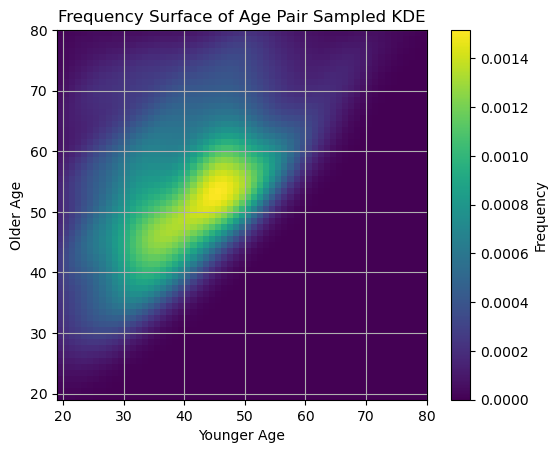

In [28]:
plt.imshow(z.T, origin='lower', extent=[19, 80, 19, 80])
plt.colorbar(label='Frequency')
plt.title('Frequency Surface of Age Pair Sampled KDE')
plt.xlabel('Younger Age')
plt.ylabel('Older Age')
plt.grid(True)
plt.show()

In [29]:
score = 0
for i in range(20, 79):
    for j in range(i+1, 80):
        score += abs(kde([i,j])[0] - age_pdf(i, j))
score

0.5833556921004368

In [30]:
sq_score = 0
for i in range(20, 79):
    for j in range(i+1, 80):
        diff = kde([i,j])[0] - age_pdf(i, j)
        sq_score += diff * diff
sq_score

0.00027806976003288074

## Thought Experiment
To improve score, you may consider taking less of people that are more common.
Consider an algorithm that throws out a person based on how common they are.
How lossy would that be?